# **Proyecto de Machine Learnig**

---



Bernabe Reinoza.

## **Planteamiento del Problema**

**¿Compara o Alquilar Casa?**

Veamos si la Ciencia de Datos nos puede ayudar a resolver el misterio… ¿Si alquilo estoy tirando el dinero a la basura? ó ¿Es realmente conveniente pagar una hipoteca durante el "resto de mi vida"?

## **Consideraciones** 
* No se tomaran en cuenta detalles como intereses de hipotecas variable/fija, porcentajes, comisiones de bancos, etc.
* El Dataset fue tomado de http://www.aprendemachinelearning.com/
* Para el dataset no tomaremos en cuenta ubicación geográfica, un cuando se sabe que este es un factor importate en los precios de las viviendas
* Ademas supondremos una hipoteca fija a 30 años con interés de mercado “bajo”


# **Dataset**


In [ ]:
# Importamos las librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest

In [ ]:
# cargamos nuestro DataSet
dataframe = pd.read_csv("/content/comprar_alquilar.csv", encoding='latin-1')
dataframe.head(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,Venta
0,6000,1000,0,600,50000,400000,soltero,2,empleado,Comprar
1,6745,944,123,429,43240,636897,casados,3,pareja: autónomo y asalariado,No comprar
2,6455,1033,98,795,57463,321779,divorciados,1,pareja: empresarios los dos o empresario y emp...,Comprar
3,7098,1278,15,254,54506,660933,soltero,0,empresario,No comprar
4,6167,863,223,520,41512,348932,soltero,0,empresario,Comprar
5,5692,911,11,325,50875,360863,casados,4,pareja: empleados,Comprar
6,6830,1298,345,309,46761,429812,casados,1,pareja: empleados,Comprar
7,6470,1035,39,782,57439,606291,soltero,0,autónomo,No comprar
8,6251,1250,209,571,50503,291010,soltero,0,empresario,Comprar
9,6987,1258,252,245,40611,324098,divorciados,1,pareja:empresario y autónomo,Comprar


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ingresos        202 non-null    int64 
 1   gastos_comunes  202 non-null    int64 
 2   pago_coche      202 non-null    int64 
 3   gastos_otros    202 non-null    int64 
 4   ahorros         202 non-null    int64 
 5   vivienda        202 non-null    int64 
 6   estado_civil    202 non-null    object
 7   hijos           202 non-null    int64 
 8   trabajo         202 non-null    object
 9   Venta           202 non-null    object
dtypes: int64(7), object(3)
memory usage: 15.9+ KB


Las columnas que tenemos son

* ingresos: los ingresos de la familia mensual
* gastos comunes: pagos de luz, agua, gas, etc mensual
* pago coche: si se está pagando cuota por uno o más coches, y los gastos en combustible, etc al mes.
* gastos_otros: compra en supermercado y lo necesario para vivir al mes
* ahorros: suma de ahorros dispuestos a usar para la compra de la casa.
* vivienda: precio de la vivienda que quiere comprar esa familia
* estado civil:
   * soltero
   * casados
   * divorciados
* hijos: cantidad de hijos menores y que no trabajan.
* trabajo:
  * sin empleo 
  * autónomo (freelance)
  * empleado
  * empresario
  * pareja: autónomos
  * pareja: empleados
  * pareja: autónomo y asalariado
  * pareja:empresario y autónomo
  * pareja: empresarios los dos o empresario y empleado
* Venta : (esta será nuestra variable dependiente, para aprender)
  * No comprar
  * Comprar 

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ingresos        202 non-null    int64 
 1   gastos_comunes  202 non-null    int64 
 2   pago_coche      202 non-null    int64 
 3   gastos_otros    202 non-null    int64 
 4   ahorros         202 non-null    int64 
 5   vivienda        202 non-null    int64 
 6   estado_civil    202 non-null    object
 7   hijos           202 non-null    int64 
 8   trabajo         202 non-null    object
 9   Venta           202 non-null    object
dtypes: int64(7), object(3)
memory usage: 15.9+ KB


# **Procesamiento de Datos**
En este apartado procesaremos el data set para prepararlo para los analisis y para extraer los datos de entranamiento y testeo para nuestro modelo.

* Ajustando las columnas categorias con LabelEncoderpara codificar etiquetas de estado civil, trabajo y venta en valores numéricos.
* agruparemos datos que pueden unirse para el analisis como  los gastos: gastos comunes,pago coche y gastos_otros.
* Otro dato importante es cuanto se necesita para el finaciomiento de una vivienda tomando en cuenta el uso de los ahorros para su adquisicion: precio de la vivienda menos los ahorros.

In [ ]:
# Procedemos a procesar los datos
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(dataframe["estado_civil"])

LabelEncoder()

In [ ]:
le.classes_

array(['casados', 'divorciados', 'soltero'], dtype=object)

In [ ]:
le.transform(dataframe["estado_civil"])

array([2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1,
       2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 1,
       2, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1,
       1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1,
       0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 1, 2,
       2, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2,
       1, 0, 0, 2])

In [ ]:
dataframe["estado_civil"] = le.transform(dataframe["estado_civil"])

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ingresos        202 non-null    int64 
 1   gastos_comunes  202 non-null    int64 
 2   pago_coche      202 non-null    int64 
 3   gastos_otros    202 non-null    int64 
 4   ahorros         202 non-null    int64 
 5   vivienda        202 non-null    int64 
 6   estado_civil    202 non-null    int64 
 7   hijos           202 non-null    int64 
 8   trabajo         202 non-null    object
 9   Venta           202 non-null    object
dtypes: int64(8), object(2)
memory usage: 15.9+ KB


In [ ]:
le.fit(dataframe["trabajo"])
le.classes_

array(['autónomo', 'empleado', 'empresario',
       'pareja: autónomo y asalariado', 'pareja: autónomos',
       'pareja: empleados',
       'pareja: empresarios los dos o empresario y empleado',
       'pareja:empresario y autónomo', 'sin empleo'], dtype=object)

In [ ]:
dataframe["trabajo"] = le.transform(dataframe["trabajo"])

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ingresos        202 non-null    int64 
 1   gastos_comunes  202 non-null    int64 
 2   pago_coche      202 non-null    int64 
 3   gastos_otros    202 non-null    int64 
 4   ahorros         202 non-null    int64 
 5   vivienda        202 non-null    int64 
 6   estado_civil    202 non-null    int64 
 7   hijos           202 non-null    int64 
 8   trabajo         202 non-null    int64 
 9   Venta           202 non-null    object
dtypes: int64(9), object(1)
memory usage: 15.9+ KB


In [ ]:
le.fit(dataframe["Venta"])
le.classes_

dataframe["Venta"] = le.transform(dataframe["Venta"])

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   Venta           202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


Luego que realizamos el encoder no qudaria:

1. estado civil:
  * 0 - casados 
  * 1 - divorciados
  * 2 - soltero
1. trabajo:
 * 0 - autónomo
 * 1 - empleado
 * 2 - empresario
 * 3 - pareja: autónomo y asalariado
 * 4 - pareja: autónomos
 * 5 - pareja: empleados
 * 6 - pareja: empresarios los dos o empresario y empleado
 * 7 - pareja:empresario y autónomo
 * 8 - sin empleo
1. Venta : (esta será nuestra variable dependiente, para aprender)
 * 0 - Comprar
 * 1 - No comprar





In [ ]:
dataframe['gastos']=(dataframe['gastos_comunes']+dataframe['gastos_otros']+dataframe['pago_coche'])
dataframe['financiar']=dataframe['vivienda']-dataframe['ahorros']
dataframe =dataframe.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ingresos      10 non-null     int64
 1   ahorros       10 non-null     int64
 2   vivienda      10 non-null     int64
 3   estado_civil  10 non-null     int64
 4   hijos         10 non-null     int64
 5   trabajo       10 non-null     int64
 6   Venta         10 non-null     int64
 7   gastos        10 non-null     int64
 8   financiar     10 non-null     int64
dtypes: int64(9)
memory usage: 848.0 bytes


# **Visualización de Datos**

Vamos a realizar un análisis exploratorio de los datos:
* Valores estadisticos
* Histgramas de las variables
* matriz de correlacion


In [ ]:
dataframe.describe()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,Venta,gastos,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,373349.638614,1.034653,1.232673,4.212871,0.668317,1698.752475,334599.970297
std,1682.862556,17365.231870,136371.525622,0.800365,1.367833,2.437116,0.471988,324.838005,126607.099497
min,2008.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,1007.000000,154716.000000
25%,3513.750000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000,1430.500000,240410.250000
50%,4947.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,1.000000,1669.500000,301177.000000
75%,6374.500000,52150.750000,444482.000000,2.000000,2.000000,6.000000,1.000000,1928.000000,393413.000000
max,7984.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,2543.000000,618621.000000


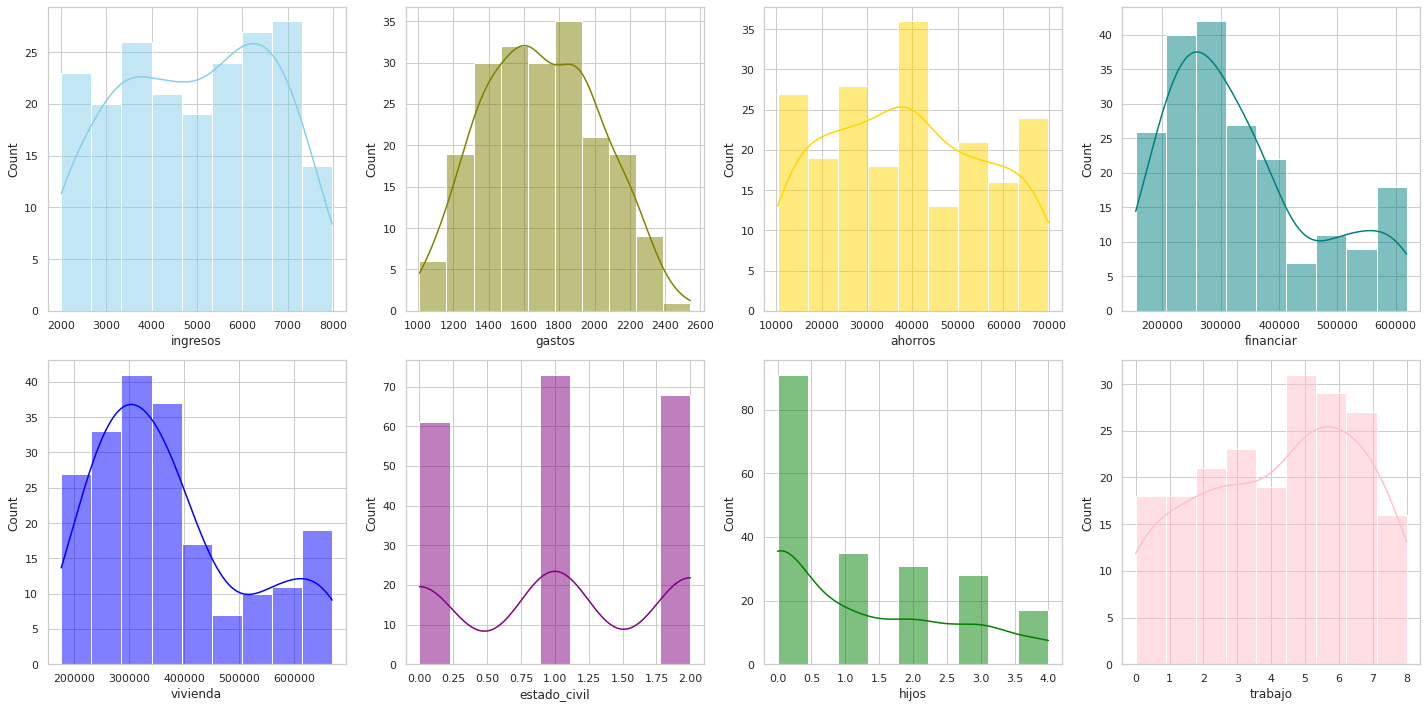

In [ ]:
sb.set(style="whitegrid")  
df_filtered= dataframe.drop(['Venta'], axis=1)
df=df_filtered
fig,axs = plt.subplots(2,4, figsize = (20,10))
sb.histplot(data=df, x="ingresos", kde=True, color="skyblue", ax=axs[0, 0])
sb.histplot(data=df, x="gastos", kde=True, color="olive", ax=axs[0, 1])
sb.histplot(data=df, x="ahorros", kde=True, color="gold", ax=axs[0, 2])
sb.histplot(data=df, x="financiar", kde=True, color="teal", ax=axs[0, 3])
sb.histplot(data=df, x="vivienda", kde=True, color="blue", ax=axs[1, 0])
sb.histplot(data=df, x="estado_civil", kde=True, color="purple", ax=axs[1,1])
sb.histplot(data=df, x="hijos", kde=True, color="green", ax=axs[1,2])
sb.histplot(data=df, x="trabajo", kde=True, color="pink", ax=axs[1,3])


fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


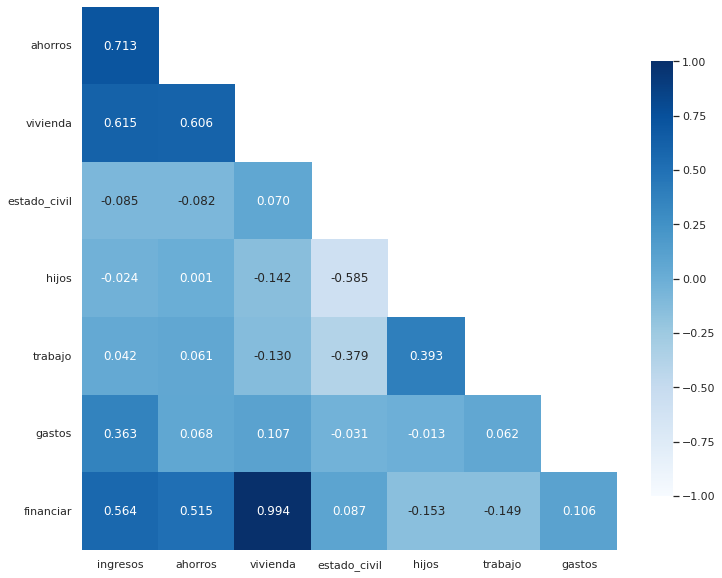

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_filtered.corr(), dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_filtered.corr().iloc[1:,:-1].copy()
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".3f", cmap='Blues', vmin=-1, vmax=1, cbar_kws={"shrink": 0.8},)
# yticks
plt.yticks(rotation=0)
plt.show()

# **Naive Bayes** 

In [ ]:
X=dataframe.drop(['Venta'], axis=1)
y=dataframe['Venta']
X_train, X_test = train_test_split(dataframe, test_size=0.2, random_state=6) 
y_train =X_train["Venta"]
y_test = X_test["Venta"]

In [ ]:
#Seleccionamos los mejores datos

best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['ingresos', 'ahorros', 'estado_civil', 'hijos', 'financiar'], dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


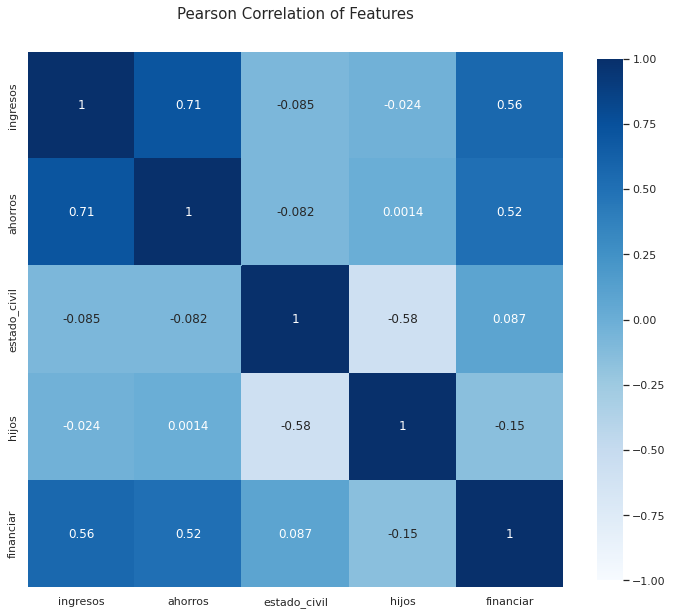

In [ ]:
used_features =X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
mask = np.triu(np.ones_like(dataframe[used_features].astype(float).corr(), dtype=np.bool))
sb.heatmap(dataframe[used_features].astype(float).corr(),cmap='Blues', vmin=-1, vmax=1, cbar_kws={"shrink": 0.8}, square=True,  linecolor='white', annot=True)


In [ ]:

gnb = GaussianNB()

gnb.fit( X_train[used_features],y_train)
y_pred = gnb.predict(X_test[used_features])

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.83
Precisión en el set de Test: 0.89


In [ ]:
X=dataframe.drop(['Venta'], axis=1)
y=dataframe['Venta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

gnb = GaussianNB()
gnb.fit( X_train,y_train)
y_pred = gnb.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.88
Precisión en el set de Test: 0.83


In [ ]:
X_train.size

48

In [ ]:
print(gnb.predict([[2000,        5000,     0,       5,         200000],
                   [6000,        34000,    2,       5,         320000] ]))

[1 0]


# **Regresion Lineal**

Utilezaremos un modelo de regresion lineal para verificar que ayude a ver si con siertas caracteriticas tenemos la posibilidad de comprar o no una vivienda. 

In [ ]:
# Separando los datos
X = df_filtered
y = dataframe["Venta"]

In [ ]:
X.head()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,gastos,financiar
0,6000,50000,400000,2,2,1,1600,350000
1,6745,43240,636897,0,3,3,1496,593657
2,6455,57463,321779,1,1,6,1926,264316
3,7098,54506,660933,2,0,2,1547,606427
4,6167,41512,348932,2,0,2,1606,307420


In [ ]:
# separando nuestros datos de entrenamiento y te pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Verificamos la  error error cuadrático medio de nuetro modelo
y_predict = lr.predict(X_test)
mean_squared_error(y_test, y_predict)

0.08604520359758977

In [ ]:
# coeficiente de determinación
lr.score(X_test, y_test)

0.6293297627115655

# **Arboles de desicion**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X=dataframe.drop(['Venta'], axis=1)
y=dataframe['Venta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)

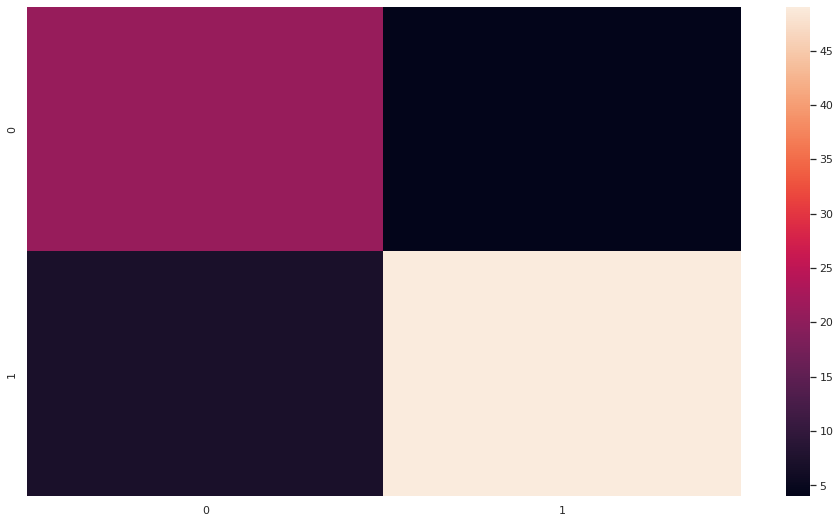

In [ ]:
sb.heatmap(matrix,annot=None, fmt=.2)

In [ ]:
def calcular_precision(TP, TN, FP, FN):
    precision = (TP + TN) / (TP + TN + FP + FN)
    precision = precision * 100
    return precision

def calcular_sensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcular_especificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def calculos (TP, TN, FP, FN):
  print("Precision: ",calcular_precision(TP, TN, FP, FN))
  print("sensibilidad: ",calcular_sensibilidad(TP, TN, FP, FN))
  print("especificidad: ", calcular_especificidad(TP, TN, FP, FN))


In [ ]:
(TN, FP, FN, TP) = matrix.ravel()

In [ ]:
calculos(TP, TN, FP, FN)

Precision:  86.41975308641975
sensibilidad:  87.5
especificidad:  84.0


In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(dataframe.columns)
features.remove("Venta")

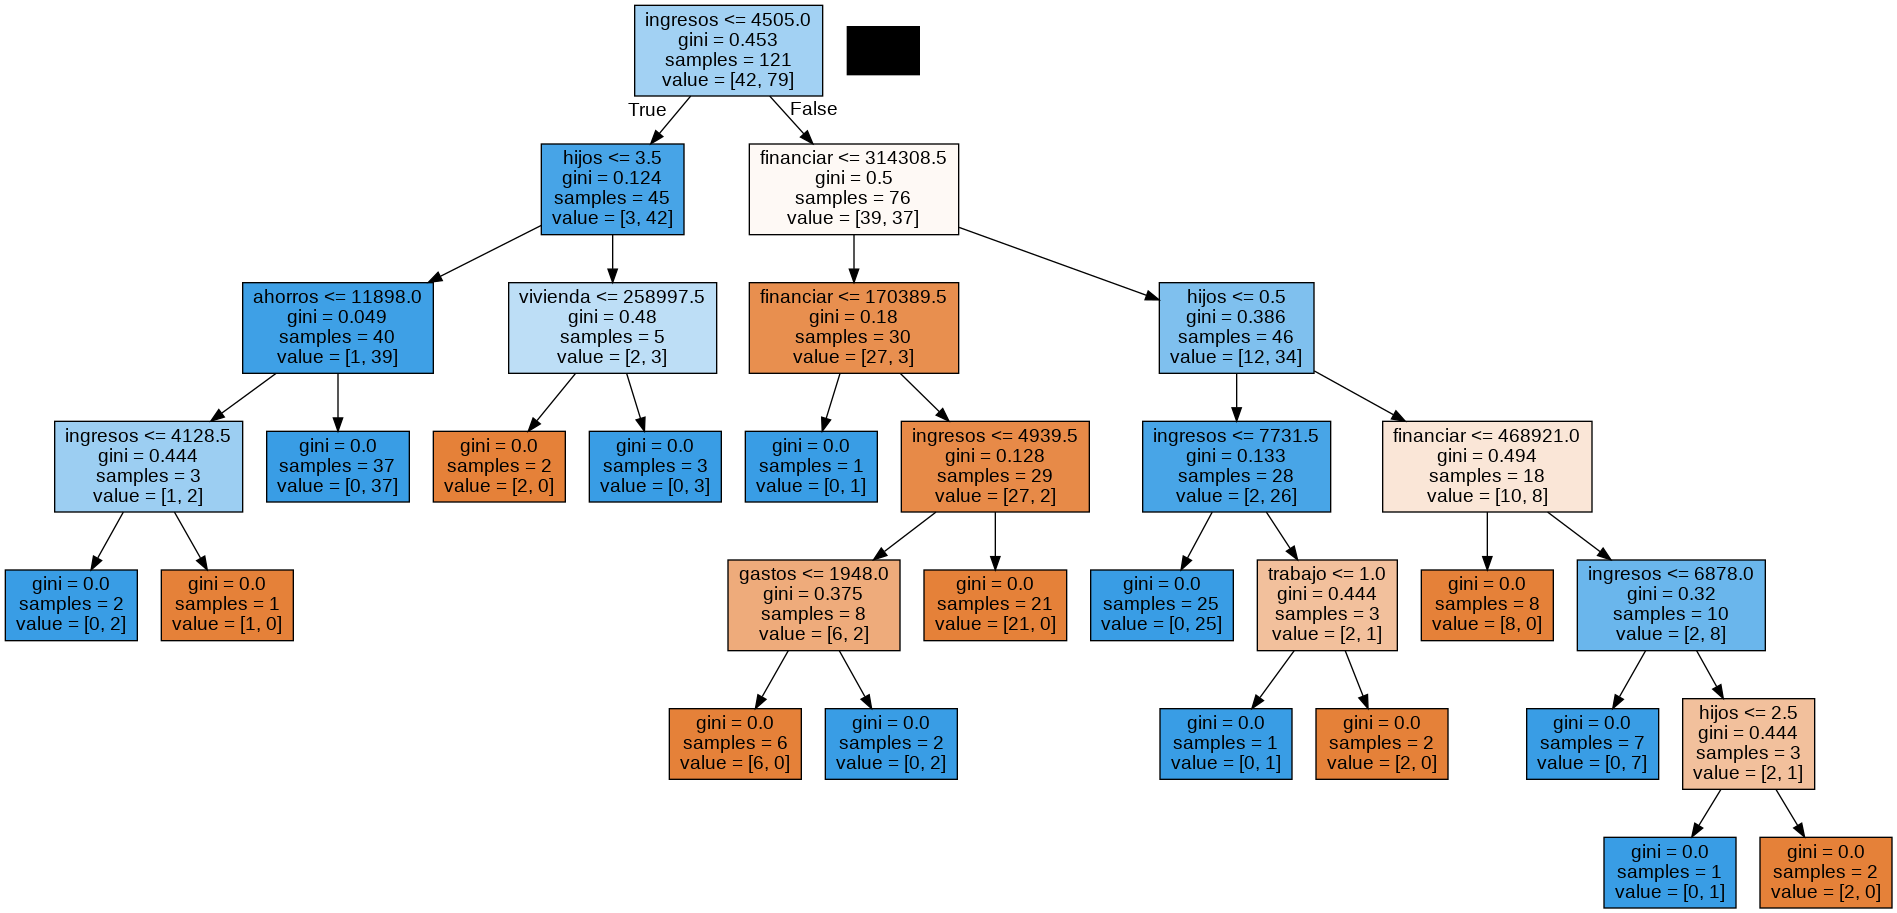

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ingresos      202 non-null    int64
 1   ahorros       202 non-null    int64
 2   vivienda      202 non-null    int64
 3   estado_civil  202 non-null    int64
 4   hijos         202 non-null    int64
 5   trabajo       202 non-null    int64
 6   Venta         202 non-null    int64
 7   gastos        202 non-null    int64
 8   financiar     202 non-null    int64
dtypes: int64(9)
memory usage: 14.3 KB


In [ ]:
print(dataframe.columns)

Index(['ingresos', 'ahorros', 'vivienda', 'estado_civil', 'hijos', 'trabajo',
       'Venta', 'gastos', 'financiar'],
      dtype='object')


In [ ]:
print(gnb.predict([[4000, 5000, 100000, 0, 2, 6,1000,95000]]))

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(tree_clf.predict([[4000, 5000, 100000, 0, 2, 6,1000,95000]]))

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
